# Feature Engineering
## Goals of this Tutorial

- Understand "What is Linear Discrimant Analysis"
- Using Python/Jupyter notebook and python libraries (e.g. panda, scikit-learn) for analysis features.
<hr>

# Introduction

***Linear Discriminant Analysis (LDA)*** is most commonly used as dimensionality reduction technique in the pre-processing step for pattern-classification and machine learning applications. The goal is to project a dataset onto a lower-dimensional space with good class-separability in order avoid overfitting (“curse of dimensionality”) and also reduce computational costs.

The LDA approach is very similar to that of the PCA, however, **in addition to finding the components that maximize the variance of our data (PCA), we are also interested in components that maximize multiclass (LDA) separation**.

In short, the objective of LDA is to design an attribute space (a database with n-dimensional samples) in a smaller subspace k (where $ k \ leq n-1 $) while maintaining the discrimination information of the classes.

In general, dimensionality reduction helps not only reduce computational costs for a given classification problem but is also useful to avoid overfitting by minimizing error in parameter estimation.
<hr>

## PCA vs LDA

Both PCA and LDA are linear transformation techniques widely used for dimensionality reduction. On the one hand, PCA can be described as an "unsupervised" algorithm, since it "ignores" the class labels and its purpose is to find the directions (main components) that maximize the variance in the database. On the other hand, the LDA is "supervised" and calculates the directions (linear discriminants) that will represent the axes that maximize the separation between multiple classes.

Although it seems that LDA is superior to PCA in multi-class problems where class labels are known, this is not always the case. For example, comparisons between classification accuracy for image recognition after PCA or LDA use shows **that PCA tends to be better than LDA if the number of samples / class is relatively small** (<a href="http://ieeexplore.ieee.org/xpl/articleDetails.jsp?arnumber=908974"> PCA vs. LDA </a>, AM Martinez et al., 2001). In practice, it is also common to use both LDA and PCA together, i.e., PCA for dimensionality reduction followed by an LDA.


<p align="center">
<img src="images/PCAvsLDA.png" width=600>
</p>

<hr>

## What is a “good” feature subspace?

Assuming our goal is to reduce the dimensions of a *** d *** - dimensional dataset by projecting into a *** k *** - dimensional subspace (where *** k <d ***). So how do we know which size we should choose for *** k *** (*** k *** = the number of dimensions of the new attribute subspace), and how to know if we have a attribute space that represents "well " our data?

Soon, we will calculate the eigenvectors (components) of our dataset and collect them in matrices called * scatter-matrices *, or rather, intra-class sparse matrices and inter-classes. Each of these eigenvectors is associated with an eigenvalue that tells us the "size" or "magnitude" of eigenvectors.

** If we observe that all eigenvalues ​​have a similar magnitude, then this may be a good indicator that our data is already projected into a "good" attribute space. **

On the other hand, if some eigenvalues ​​have a much greater magnitude than the others, we must choose their eigenvectors since they contain more information about the distribution of our data. Likewise, eigenvalues ​​close to zero are less informative and we should disregard them in building our subspace.
<hr>

## Summarizing the LDA approach in 5 steps

Listed below are the 5 general steps for performing a linear discriminant analysis; we will explore them in more detail in the following sections.

1. Calculate the mean (vector ** d ** - dimensional) for each of the classes in the dataset
2. Calculate the scatter-matrices (intra-class and inter-class)
3. Calculate the eigenvectors ($ e_1, e_2, ..., e_d $) and their corresponding eigenvalues ($ \ lambda_1, \ lambda_2, ... \ lambda_d $) for the scatter-matrices.
4. Sort the eigenvectors by the eigenvalues in descending order and choose the eigenvectors with the largest eigenvalues to form a matrix ** W ** [$ d \ times k $], where each column represents an eigenvector.
5. Use ** W ** to transform the samples into the new subspace. This can be summed up by multiplying matrices: $ Y = X \ times W $ (where ** X ** [$ n \ times d $] is the matrix representing our dataset with *** n *** samples, and ** Y ** is the matrix of the samples transformed into the new subspace [$ n \ times k $]).

<hr>

# Import library

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# database
from sklearn.datasets import load_iris

pd.options.display.max_rows = 10

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Dataset

## Importing dataset

In this tutorial, we will use the ** Iris dataset **, already present in scikit-learn. The Iris dataset contains data of 150 flowers divided into 3 different species (setosa, versicolor, virginica). The data is:

1. sepal lenght in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm

<img src="images/Iris-dataset.png" width=500>

In [2]:
iris = load_iris()
print(iris.data.shape)
print(iris.target.shape)
print(iris.feature_names)
print(iris.target_names)


df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['class'] = iris.target
# df['class'] = df['class'].map({0:iris.target_names[0], 1:iris.target_names[1], 2:iris.target_names[2]})
df

(150, 4)
(150,)
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [3]:
# split the data table into data X and class labels Y
x = df.iloc[:, 0:4].values
y = df.iloc[:, 4].values
print(x.shape, y.shape)

(150, 4) (150,)


<hr>
## Data Analysis

In [4]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


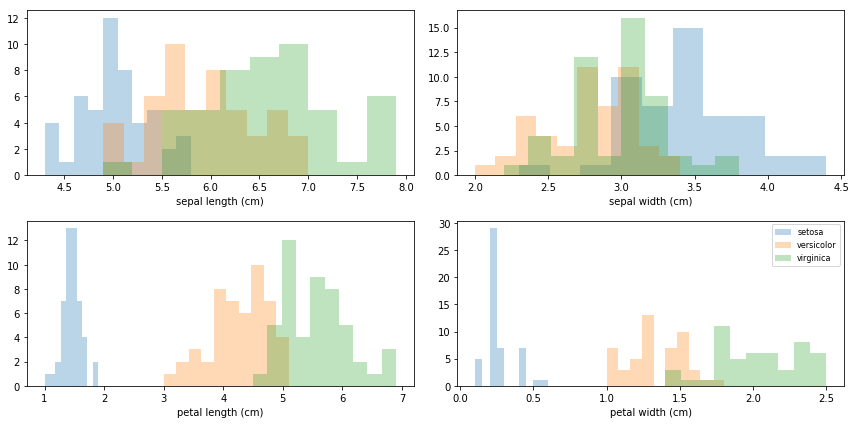

In [5]:
plt.figure(figsize=(12,6))
for f in range(4):
    plt.subplot(2, 2, f+1)
    for label in iris.target_names:
        plt.hist(x[y==(list(iris.target_names).index(label)), f], label=label, bins=10, alpha=0.3)
        plt.xlabel(iris.feature_names[f])
plt.legend(loc='upper right', fancybox=True, fontsize=8)
plt.tight_layout()


Just by looking at the graphs, it is easy to see that the attributes ** petal length ** and ** petal width ** are potential attributes to separate the flowers by the classes. In practice, instead of reducing dimensionality via projection (LDA), a good alternative would be to apply a feature selection technique.
<hr>

## Normality assumptions

Like other algorithms, the LDA assumes that the data are normally distributed, the attributes are statistically independent, and the covariance matrix is identical for each class. However, this only applies to LDA as a classifier. As a dimensionality reducer, the LDA also works reasonably well if these assumptions are violated. And even for classification tasks the LDA can be robust the data distribution:

<a> "Linear discriminant analysis frequently achieves good performances in the tasks of face and object recognition, even though the assumptions of common covariance matrix among groups and normality are often violated (Duda, et al., 2001)" <a href = "https://link.springer.com/article/10.1007/s10115-006-0013-y">(Tao Li, et al., 2006) </a>.
<hr>

# Linear Discrimant Analysis in 5 steps

## Step 1: Computing the d-dimensional mean vectors

Let us begin by calculating the mean vectors ** $ m_i, i = (0,1,2) $ ** for the 3 classes of flowers:

$$
\pmb m_i = \begin{bmatrix}
\mu_{\omega_i (\text{sepal length)}}\\
\mu_{\omega_i (\text{sepal width})}\\
\mu_{\omega_i (\text{petal length)}}\\
\mu_{\omega_i (\text{petal width})}\\
\end{bmatrix} \; , \quad \text{for} \quad i = 0,1,2
$$

In [6]:
mean_vectors = []
for c in range(0,3):
    mean_vectors.append(np.mean(x[y==c], axis=0))
    print('Mean vector class {0}: {1}'.format(c, mean_vectors[c]))

Mean vector class 0: [ 5.006  3.428  1.462  0.246]
Mean vector class 1: [ 5.936  2.77   4.26   1.326]
Mean vector class 2: [ 6.588  2.974  5.552  2.026]


<hr>
## Step 2: Computing the Scatter Matrices

Now let's calculate the two 4x4 matrices: intra-class and inter-class.

### Between-class scatter matrix $S_W$
The scatter matrix ** Between-class** $ S_W $ is calculated by the following equation:
$$S_W = \sum_{i=1}^{c}S_i$$

Where,
$$S_i = \sum\limits_{\pmb x \in D_i}^n (\pmb x - \pmb m_i)\;(\pmb x - \pmb m_i)^T$$

and $ m_i $ is the mean vector.

In [7]:
S_W = np.zeros((4,4))
for c,mv in zip(range(0,3), mean_vectors):
    class_sc_mat = np.zeros((4,4))                  # scatter matrix for every class
    for row in x[y == c]:
        row, mv = row.reshape(4,1), mv.reshape(4,1) # make column vectors
        class_sc_mat += (row-mv).dot((row-mv).T)
    S_W += class_sc_mat                             # sum class scatter matrices
print('between-class scatter matrix:\n', S_W)

between-class scatter matrix:
 [[ 38.9562  13.63    24.6246   5.645 ]
 [ 13.63    16.962    8.1208   4.8084]
 [ 24.6246   8.1208  27.2226   6.2718]
 [  5.645    4.8084   6.2718   6.1566]]


Alternatively, we could calculate the covariance matrices by adding a scaling factor $ \frac {1} {N-1}$ to the between-class scatter matrix, as soon as our equation would become:

$$\Sigma_i = \frac{1}{N_{i}-1} \sum\limits_{\pmb x \in D_i}^n (\pmb x - \pmb m_i)\;(\pmb x - \pmb m_i)^T$$
and

$$S_W = \sum\limits_{i=1}^{c} (N_{i}-1) \Sigma_i$$

where $N_i$ is the sample size for the respective class (in our case: 50), and in this particular case, we could discard the term $(N_i-1)$ since all classes have the same sample size.

However, the resulting autosomes would be the same (even eigenvectors, only the eigenvalues would be differently scaled by a constant factor).
<hr>

### Entre-classes scatter matrix $S_B$

The scatter matrix **entre-classes*** $ S_B $ is calculated by the following equation:

$$S_B =  \sum\limits_{i=1}^{c} N_{i} (\pmb m_i - \pmb m) (\pmb m_i - \pmb m)^T$$

Where ** m ** is the general mean, and $m_i$ and $N_i$ are the sample mean and size of the respective classes.

In [8]:
overall_mean = np.mean(x, axis=0)

S_B = np.zeros((4,4))
for i, mean_vec in enumerate(mean_vectors):
    n = x[y==i,:].shape[0]
    mean_vec = mean_vec.reshape(4,1) # make column vector
    overall_mean = overall_mean.reshape(4,1) # make column vector
    S_B += n * (mean_vec - overall_mean).dot((mean_vec - overall_mean).T)
    
print('entre-classes scatter matrix:\n', S_B)

entre-classes scatter matrix:
 [[  63.21213333  -19.95266667  165.2484       71.27933333]
 [ -19.95266667   11.34493333  -57.2396      -22.93266667]
 [ 165.2484      -57.2396      437.1028      186.774     ]
 [  71.27933333  -22.93266667  186.774        80.41333333]]


<hr>
## Step 3: Calculate the eigenvalues for the matrix $S_W^{-1} S_B$

Now let us compute the eigenvalues for the matrix $S_W ^ - 1 S_B$ to obtain the linear discriminants.

In [9]:
eig_vals, eig_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

for i in range(len(eig_vals)):
    eigvec_sc = eig_vecs[:,i].reshape(4,1)
    print('\eigenvectors {0}: \n{1}'.format(i+1, eigvec_sc.real))
    print('eigenvalues {:}: {:.2e}'.format(i+1, eig_vals[i].real))

\eigenvectors 1: 
[[ 0.20874182]
 [ 0.38620369]
 [-0.55401172]
 [-0.7073504 ]]
eigenvalues 1: 3.22e+01
\eigenvectors 2: 
[[-0.00653196]
 [-0.58661055]
 [ 0.25256154]
 [-0.76945309]]
eigenvalues 2: 2.85e-01
\eigenvectors 3: 
[[ 0.60035643]
 [ 0.04986186]
 [ 0.11694284]
 [-0.78956338]]
eigenvalues 3: 6.49e-15
\eigenvectors 4: 
[[-0.43138929]
 [ 0.43583574]
 [ 0.48618106]
 [-0.622558  ]]
eigenvalues 4: -5.31e-15


As a reminder, both autovetore and eigenvalues give us information about distortion in a linear transformation: **eigenvectors are basically the direction of this distortion**, while **eigenvalues represent the scaling factor for eigenvectors that describe magnitude of the distortion **.

If we are applying LDA for dimensionality reduction, eigenvectors are important since they will form the new axes of the new attribute subspace; the associated self-scores are particularly important because they tell us how "informative" the new axes are.
<hr>

### Verification of eigenvectors and eigenvalues
We can check our eigenvectors and eigenvalues calculated by checking the following equation:
$$Av = \lambda v$$

where,
$$A = S_W^{-1}S_B$$
$$v = eigenvectors$$
$$\lambda = eigenvalues$$

In [10]:
for i in range(len(eig_vals)):
    eigv = eig_vecs[:,i].reshape(4,1)
    print(np.linalg.inv(S_W).dot(S_B).dot(eigv).T, (eig_vals[i]*eigv).T, sep='\n', end='\n\n')

[[  6.71980194  12.43264174 -17.83470592 -22.77097388]]
[[  6.71980194  12.43264174 -17.83470592 -22.77097388]]

[[-0.00186416 -0.1674134   0.0720788  -0.21959502]]
[[-0.00186416 -0.1674134   0.0720788  -0.21959502]]

[[  3.99680289e-15  -4.44089210e-15  -1.77635684e-15  -1.06581410e-14]]
[[  3.89722560e-15   3.23679255e-16   7.59136765e-16  -5.12546623e-15]]

[[  3.10862447e-15   1.33226763e-15  -7.10542736e-15  -2.66453526e-15]]
[[  2.29036264e-15  -2.31397006e-15  -2.58126699e-15   3.30532914e-15]]



<hr>
## Step 4: Selection of linear discriminants
### Sorting eigenvectors by eigenvalues in descending order
We are not interested in just projecting the data into a subspace that increases the separation between classes, but also reduces the dimensionality of our attribute space. However, eigenvectors only define the directions of the new axes, since they are all unit vectors.

Therefore, to decide which eigenvector (s) we will choose, we will look at the corresponding eigenvalues of each eigenvector. Generally speaking, let us look at the eigenvectors with the highest eigenvalues associated with them.

The most common way to do this is to sort the eigenvalues in descending order and choose the top-k eigenvectors associated.

In [11]:
# Create a list of tuples (eigenvalue, eigenvector)
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the pair in descending order
eig_pairs.sort
eig_pairs.reverse

print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
32.1919291983
0.285391042623
6.4915197282e-15
5.30927099323e-15


By analyzing the eigenvalues, we can see that 2 eigenvalues are close to zero. This happens because they do not carry any associated information. In fact, they should be exactly 0, but they are not due to imprecision of floating points. In LDA, the number of linear discriminants is at most $c-1$ where **c** is the number of classes, since the sparse matrix $ -s_B $ is the sum of the **c** matrices with rank 1 or less. Note that in the rare case of perfect colinearity (all points of the sample aligned in a straight line), the covariance matrix should have rank 1, which would result in only one eigenvector with an eigenvalue other than zero.

Now, let's calculate the ** explained variance ** in terms of percentage:

In [12]:
print('Variance explained')
eigv_sum = sum(eig_vals)
for i,j in enumerate(eig_pairs):
    print('eigenvalue {0:}: {1:.2%}'.format(i+1, (j[0]/eigv_sum).real))

Variance explained
eigenvalue 1: 99.12%
eigenvalue 2: 0.88%
eigenvalue 3: 0.00%
eigenvalue 4: 0.00%


The first autopare is by far the most representative, and we will not lose much information if we form a 1D space based on this autopare.
<hr>

### Choosing the *k* eigenvectors with the highest eigenvalues
After sorting the autopares in descending order by eigenvalues, now it's time to construct our $k \times d$-dimensional eigenvector matrix w ($4 \times 2$: choosing the 2 most informative autopares) and thus reducing our initial 4-dimensional space in a 2-dimensional subspace.

In [13]:
W = np.hstack((eig_pairs[0][1].reshape(4,1), eig_pairs[1][1].reshape(4,1)))
print('Matrix W:', W.real, sep='\n')

Matrix W:
[[ 0.20874182 -0.00653196]
 [ 0.38620369 -0.58661055]
 [-0.55401172  0.25256154]
 [-0.7073504  -0.76945309]]


<hr>
## Step 5: Transforming the samples into the new subspace
Finally, let's use our **W** matrix (4x2) to transform our samples into the new subspace through the equation:

$$Y = X \times W$$

where,
- **X**: matrix $n \times d$ representing the *n* samples
- **Y**: transformed matrix $n \times k$ of the samples in the new subspace

In [14]:
X = x.dot(W)
X.shape

(150, 2)

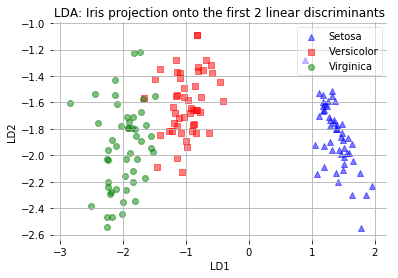

In [15]:
def plot_step_lda():
    label_dict = {0: 'Setosa', 1: 'Versicolor', 2:'Virginica'}
    
    ax = plt.subplot(111)
    for label,marker,color in zip(
        range(0,3),('^', 's', 'o'),('blue', 'red', 'green')):

        plt.scatter(x=X[:,0].real[y == label],
                y=X[:,1].real[y == label],
                marker=marker,
                color=color,
                alpha=0.5,
                label=label_dict[label]
                )

    plt.xlabel('LD1')
    plt.ylabel('LD2')

    leg = plt.legend(loc='upper right', fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.title('LDA: Iris projection onto the first 2 linear discriminants')

    # hide axis ticks
    plt.tick_params(axis="true", which="true", bottom="false", top="false",  
            labelbottom="true", left="false", right="false", labelleft="true")

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    

    plt.grid()
    plt.tight_layout
    plt.show()

plot_step_lda()

The graph above represents our new subspace that we built via LDA. We can see that our first linear discriminant "LD1" separates the classes from quite satisfactory form. However, the second discriminant, "LD2", does not add much useful information, as we saw when calculating the explained variance.
<hr>

# Comparison between PCA and LDA
To compare the subspace of attributes that we obtain by LDA, we will use the <a href="http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html">PCA do scikit-learn</a>.

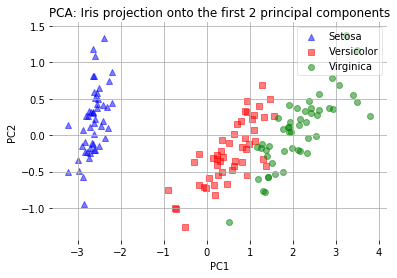

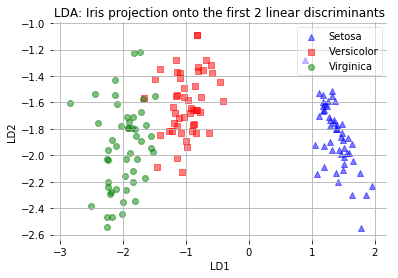

In [16]:
from sklearn.decomposition import PCA as sklearnPCA

sklearn_pca = sklearnPCA(n_components=2)
X_pca = sklearn_pca.fit_transform(x)

def plot_pca():    
    label_dict = {0: 'Setosa', 1: 'Versicolor', 2:'Virginica'}
    ax = plt.subplot(111)

    for label,marker,color in zip(
        range(0,3),('^', 's', 'o'),('blue', 'red', 'green')):

        plt.scatter(x=X_pca[:,0][y == label],
                y=X_pca[:,1][y == label],
                marker=marker,
                color=color,
                alpha=0.5,
                label=label_dict[label]
                )

    plt.xlabel('PC1')
    plt.ylabel('PC2')

    leg = plt.legend(loc='upper right', fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.title('PCA: Iris projection onto the first 2 principal components')

    # hide axis ticks
    plt.tick_params(axis="true", which="true", bottom="flase", top="flase",  
            labelbottom="true", left="flase", right="flase", labelleft="true")

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    

    plt.tight_layout
    plt.grid()

    plt.show()

plot_pca()
plot_step_lda()

The two plots above nicely confirm what we have discussed before: Where the PCA accounts for the most variance in the whole dataset, the LDA gives us the axes that account for the most variance between the individual classes.

<hr>
# LDA via scikit-learn
Now, after we have seen how an Linear Discriminant Analysis works using a step-by-step approach, there is also a more convenient way to achive the same via the LDA class implemented in the [scikit-learn](https://scikit-learn.org/stable/) machine learning library.

In [17]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

sklearn_lda = LDA(n_components=2)
x_lda_sklearn = sklearn_lda.fit_transform(x, y)

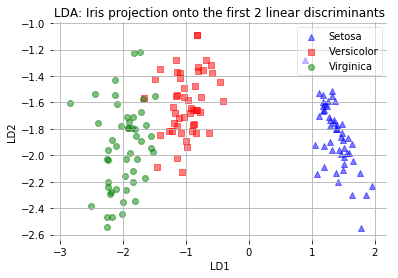

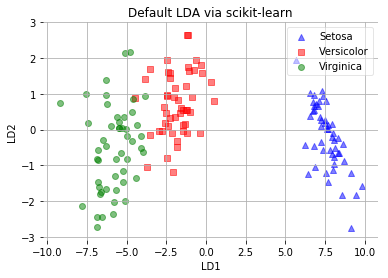

In [18]:
def plot_scikit_lda(X, title):
    label_dict = {0: 'Setosa', 1: 'Versicolor', 2:'Virginica'}
    ax = plt.subplot(111)
    for label,marker,color in zip(
        range(0,3),('^', 's', 'o'),('blue', 'red', 'green')):

        plt.scatter(x=X[:,0][y == label],
                    y=X[:,1][y == label] * -1, # flip the figure
                    marker=marker,
                    color=color,
                    alpha=0.5,
                    label=label_dict[label])

    plt.xlabel('LD1')
    plt.ylabel('LD2')

    leg = plt.legend(loc='upper right', fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.title(title)

    # hide axis ticks
    plt.tick_params(axis="true", which="true", bottom="flase", top="flase",  
            labelbottom="true", left="flase", right="flase", labelleft="true")

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    

    plt.grid()
    plt.tight_layout
    plt.show()

plot_step_lda()
plot_scikit_lda(x_lda_sklearn, title='Default LDA via scikit-learn')

The two plots above nicely confirm what we have discussed before: Where the PCA accounts for the most variance in the whole dataset, the LDA gives us the axes that account for the most variance between the individual classes.

<hr>
# Note on Standardization
Attribute scaling (such as standardization) **does not** affect the overall results of an LDA and therefore may be optional. Obviously, the scatter matrices will be different depending on whether the attributes were normalized or not. Also, eigenvectors will be different as well. However, the important thing is that the eigenvalues will be exactly the same as the final projections -the only difference you'll notice is the scale of the axes. This can be shown mathematically (future works) and you can find in the references the practical demonstration.

# Reference
1. <a href="http://sebastianraschka.com/Articles/2014_python_lda.html">http://sebastianraschka.com/Articles/2014_python_lda.html</a>